In [1]:
# Install the Prophet
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [3]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Set crypto variable
crypto = 'DOGE'

# Create crypto df
crypto_df = f'{crypto}_df'.lower()

In [5]:
# Store the crypto data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
crypto_df = pd.read_csv(
    f'~/crypto-forecast/Resources/{crypto}-USD.csv',
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
crypto_df = crypto_df.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(crypto_df.head())
display(crypto_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-14,0.148433,0.154765,0.144361,0.145419,0.145419,1899294334
2024-05-15,0.145419,0.156989,0.145400,0.155526,0.155526,1767635344
2024-05-16,0.155529,0.159025,0.149070,0.149637,0.149637,1374063837
2024-05-17,0.149637,0.156364,0.149517,0.155563,0.155563,1112782871
2024-05-18,0.155551,0.156717,0.151737,0.152578,0.152578,1010570048


In [6]:
# Get last closing price
last_close_df = crypto_df.iloc[-1]
last_close_price = last_close_df['Close']
last_close_price

0.152578

In [7]:
crypto_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993819,0.993675,0.992445,0.992445,0.549472
High,0.993819,1.000000,0.986421,0.995078,0.995078,0.614940
Low,0.993675,0.986421,1.000000,0.994539,0.994539,0.513718
Close,0.992445,0.995078,0.994539,1.000000,1.000000,0.582793
Adj Close,0.992445,0.995078,0.994539,1.000000,1.000000,0.582793
Volume,0.549472,0.614940,0.513718,0.582793,0.582793,1.000000


In [8]:
# Create new df with just Close prices and Volume
df_close = crypto_df[['Close', 'Volume']]

In [9]:
df_close.name = 'Close'
df_close

,Close,Volume
Date,,
2017-11-09,0.001415,6259550
2017-11-10,0.001163,4246520
2017-11-11,0.001201,2231080
2017-11-12,0.001038,3288960
2017-11-13,0.001211,2481270
...,...,...
2024-05-14,0.145419,1899294334
2024-05-15,0.155526,1767635344
2024-05-16,0.149637,1374063837


In [10]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_close_ma = df_close.copy()

# Calculate 10-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA10'] = df_close_ma['Close'].rolling(10).mean()

# Calculate 30-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA30'] = df_close_ma['Close'].rolling(30).mean()

# Calculate 50-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA50'] = df_close_ma['Close'].rolling(50).mean()

# Remove NULL values
df_close_ma.dropna(inplace=True)

In [11]:
# Review the first and last five rows of the DataFrame
display(df_close_ma.head())
display(df_close_ma.tail())

,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2017-12-28,0.008486,51201500,0.007735,0.004723,0.003451
2017-12-29,0.009391,62474900,0.008107,0.004966,0.003610
2017-12-30,0.007860,56175300,0.008227,0.005159,0.003744
2017-12-31,0.008972,62256400,0.008382,0.005386,0.003900
2018-01-01,0.008909,50616900,0.008667,0.005612,0.004057


,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2024-05-14,0.145419,1899294334,0.148532,0.149719,0.165981
2024-05-15,0.155526,1767635344,0.147977,0.149525,0.165442
2024-05-16,0.149637,1374063837,0.147280,0.149313,0.164628
2024-05-17,0.155563,1112782871,0.147818,0.149578,0.163338
2024-05-18,0.152578,1010570048,0.148746,0.149583,0.162120


<Axes: xlabel='Date'>

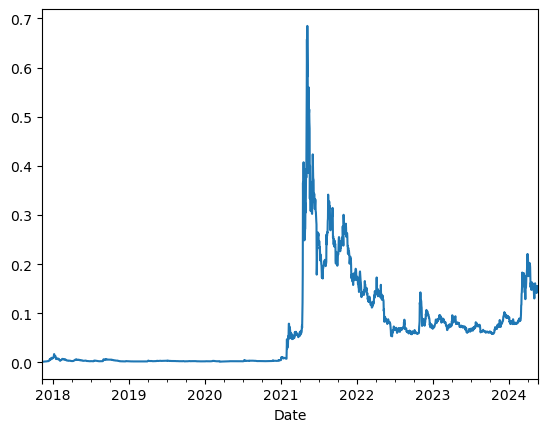

In [12]:
# Plot Close
df_close['Close'].plot()

In [13]:
## Create a Time Series Model with Prophet

In [14]:
# Using the DataFrame, reset the index so the date information is no longer the index
df_close = df_close.reset_index()

In [15]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_close.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_close.dropna()

# View the first and last five rows of the DataFrame
df_close

,ds,y,Volume
0,2017-11-09,0.001415,6259550
1,2017-11-10,0.001163,4246520
2,2017-11-11,0.001201,2231080
3,2017-11-12,0.001038,3288960
4,2017-11-13,0.001211,2481270
...,...,...,...
2378,2024-05-14,0.145419,1899294334
2379,2024-05-15,0.155526,1767635344
2380,2024-05-16,0.149637,1374063837
2381,2024-05-17,0.155563,1112782871


In [16]:
# Call the Prophet function, store as an object
crypto_model = Prophet()

In [17]:
# Fit the time-series model.
crypto_model.fit(df_close)

18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out 30 days
crypto_future = crypto_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the DataFrame
crypto_future.tail(5)

,ds
2468,2024-08-12
2469,2024-08-13
2470,2024-08-14
2471,2024-08-15
2472,2024-08-16


In [19]:
# Make the predictions for the data using the DataFrame
crypto_forecast = crypto_model.predict(crypto_future)

# Display the first five rows of the DataFrame
crypto_forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2443,2024-07-18,0.121984,0.061889,0.147172,0.116442,0.128869,-0.017838,-0.017838,-0.017838,-0.000320,-0.000320,-0.000320,-0.017518,-0.017518,-0.017518,0.0,0.0,0.0,0.104146
2444,2024-07-19,0.122086,0.061111,0.147660,0.116446,0.129166,-0.017009,-0.017009,-0.017009,0.000495,0.000495,0.000495,-0.017504,-0.017504,-0.017504,0.0,0.0,0.0,0.105077
2445,2024-07-20,0.122188,0.060820,0.148364,0.116300,0.129554,-0.017112,-0.017112,-0.017112,0.000344,0.000344,0.000344,-0.017456,-0.017456,-0.017456,0.0,0.0,0.0,0.105076
2446,2024-07-21,0.122290,0.057424,0.150422,0.116201,0.129886,-0.016963,-0.016963,-0.016963,0.000408,0.000408,0.000408,-0.017371,-0.017371,-0.017371,0.0,0.0,0.0,0.105327
2447,2024-07-22,0.122392,0.058769,0.147606,0.116157,0.130173,-0.017289,-0.017289,-0.017289,-0.000044,-0.000044,-0.000044,-0.017246,-0.017246,-0.017246,0.0,0.0,0.0,0.105103
2448,2024-07-23,0.122494,0.061130,0.149150,0.115971,0.130564,-0.017525,-0.017525,-0.017525,-0.000450,-0.000450,-0.000450,-0.017076,-0.017076,-0.017076,0.0,0.0,0.0,0.104969
2449,2024-07-24,0.122596,0.061787,0.149851,0.115563,0.130903,-0.017289,-0.017289,-0.017289,-0.000432,-0.000432,-0.000432,-0.016857,-0.016857,-0.016857,0.0,0.0,0.0,0.105307
2450,2024-07-25,0.122698,0.063215,0.146405,0.115364,0.131199,-0.016905,-0.016905,-0.016905,-0.000320,-0.000320,-0.000320,-0.016585,-0.016585,-0.016585,0.0,0.0,0.0,0.105793
2451,2024-07-26,0.122800,0.062887,0.151970,0.115255,0.131521,-0.015761,-0.015761,-0.015761,0.000495,0.000495,0.000495,-0.016256,-0.016256,-0.016256,0.0,0.0,0.0,0.107039
2452,2024-07-27,0.122902,0.062254,0.150340,0.115142,0.131899,-0.015523,-0.015523,-0.015523,0.000344,0.000344,0.000344,-0.015866,-0.015866,-0.015866,0.0,0.0,0.0,0.107380


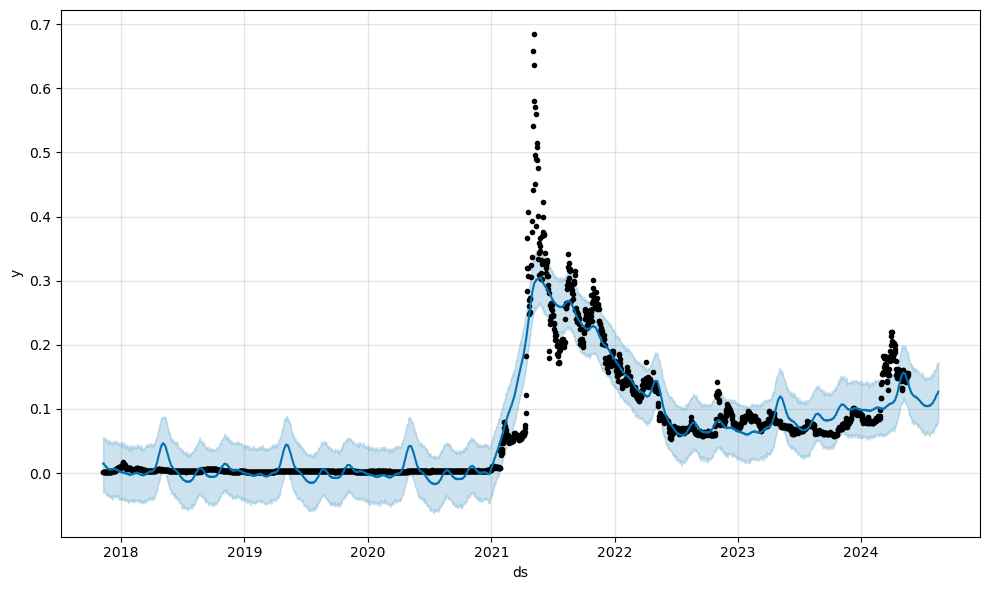

In [20]:
# Plot the Prophet predictions for the data
fig1 = crypto_model.plot(crypto_forecast)

In [21]:
# Set the index in the forecast DataFrame to the ds datetime column
crypto_forecast = crypto_forecast.set_index('ds')

In [22]:
# View only the yhat,yhat_lower and yhat_upper columns from the forecast DataFrame
crypto_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-05-19,0.140451,0.098325,0.182230
2024-05-20,0.138155,0.099558,0.180928
2024-05-21,0.135936,0.090575,0.176931
2024-05-22,0.134193,0.093861,0.177621
2024-05-23,0.132612,0.089705,0.174227
...,...,...,...
2024-08-12,0.122292,0.073478,0.169526
2024-08-13,0.122963,0.078009,0.167581
2024-08-14,0.124005,0.077694,0.168972


In [23]:
# Rename columns
crypto_forecast.rename(columns={'yhat':'mid trend price','yhat_lower':'lower trend price','yhat_upper':'upper trend price'}, inplace=True)

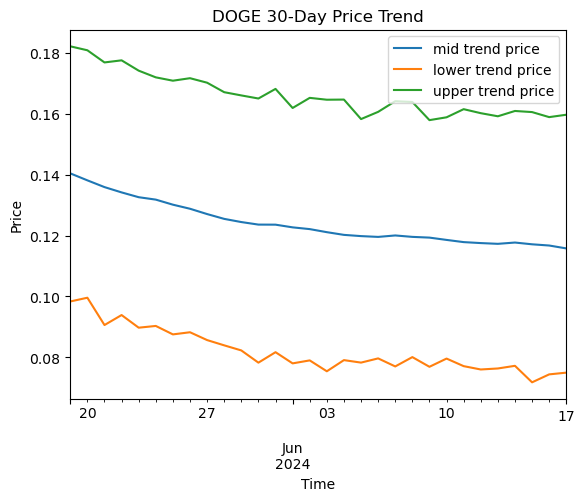

In [24]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-60,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 30-Day Price Trend')    
plt.show()

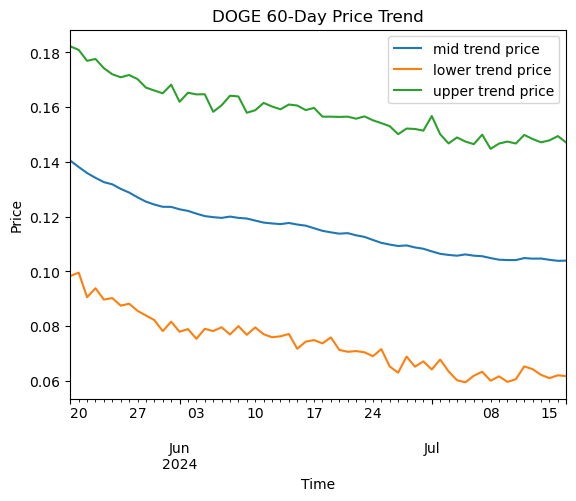

In [25]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-30,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 60-Day Price Trend')    
plt.show()

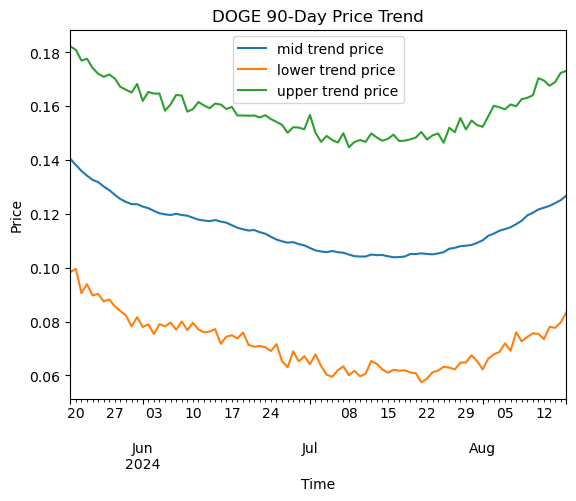

In [26]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 90-Day Price Trend')    
plt.show()

In [27]:
# Retrieve last closing price
last_close_price

0.152578

In [28]:
# Retreive tomorrow's mid trend price forecast
tommorow_mid_trend_price = crypto_forecast['mid trend price'].iloc[-90]
tommorow_mid_trend_price

0.14045077745238427

In [29]:
# Retrieve mid trend price in 30 days
mid_trend_price_in_30 = crypto_forecast['mid trend price'].iloc[-60]
mid_trend_price_in_30

0.11483327261042571

In [30]:
# Retrieve mid trend price in 60 days
mid_trend_price_in_60 = crypto_forecast['mid trend price'].iloc[-30]
mid_trend_price_in_60

0.10414570580594765

In [31]:
# Retrieve mid trend price in 90 days
mid_trend_price_in_90 = crypto_forecast['mid trend price'].iloc[-1]
mid_trend_price_in_90

0.12677484137298306

In [32]:
# Calculate expected gain/loss between mid trend price in 30 days and last close price
percent_diff_30 = ((mid_trend_price_in_30)/(last_close_price))-1
percent_diff_30.round(3)

-0.247

In [33]:
# Calculate expected gain/loss between mid trend price in 60 days and last close price
percent_diff_60 = ((mid_trend_price_in_60)/(last_close_price))-1
percent_diff_60.round(3)

-0.317

In [34]:
# Calculate expected gain/loss between mid trend price in 90 days and last close price
percent_diff_90 = ((mid_trend_price_in_90)/(last_close_price))-1
percent_diff_90.round(3)

-0.169

In [35]:
# Reset the index in the forecast DataFrame
crypto_forecast = crypto_forecast.reset_index()

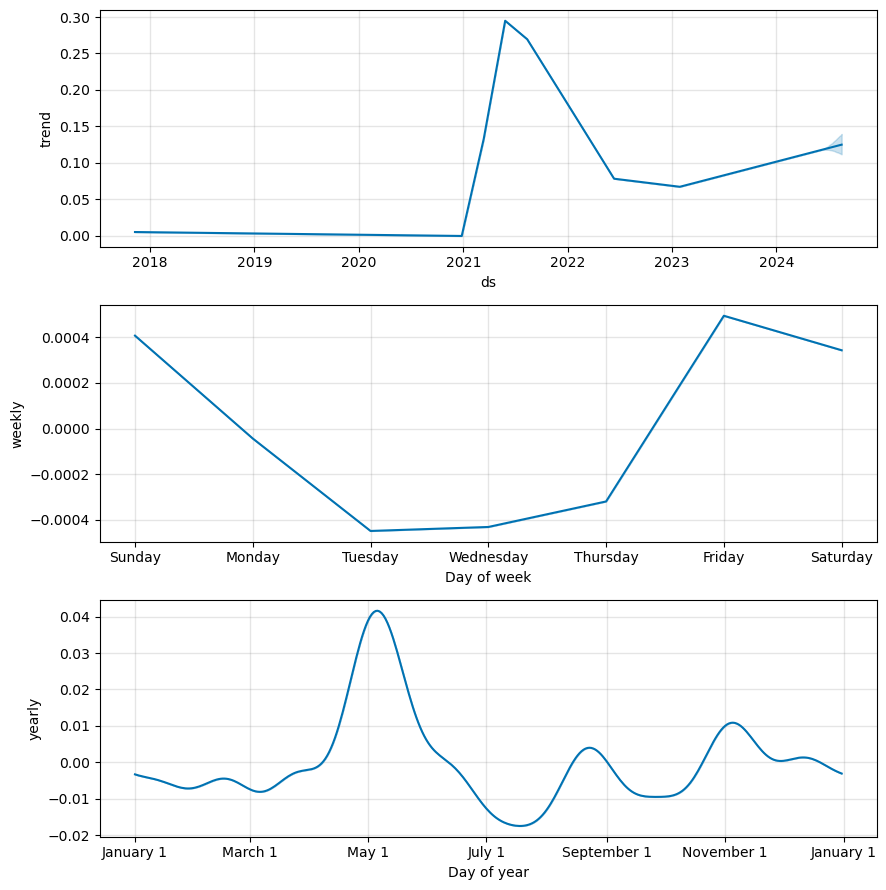

In [36]:
# Use the plot_components function to visualize the forecast results
# for the forecast DataFrame
fig2 = crypto_model.plot_components(crypto_forecast)

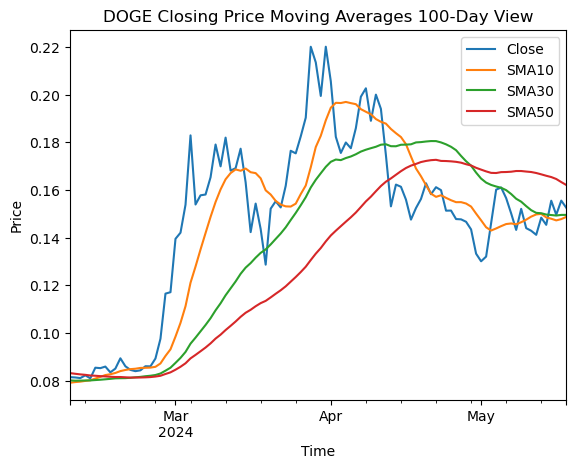

In [37]:
df_last_100 = df_close_ma.iloc[-100:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 100-Day View')    
plt.show()

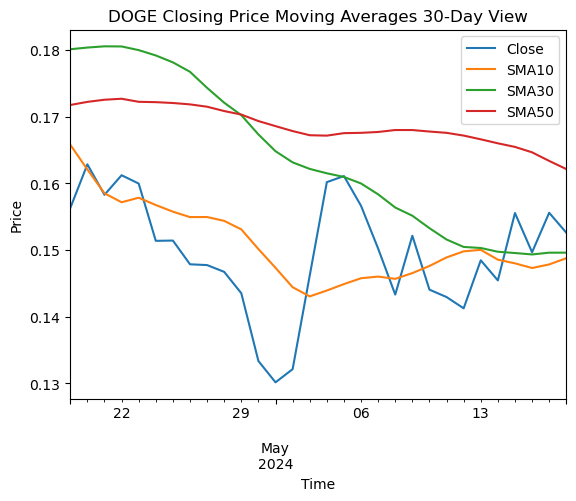

In [38]:
df_last_100 = df_close_ma.iloc[-30:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 30-Day View')    
plt.show()

In [39]:
# import module
from datetime import datetime
 
# get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d")
print("Current date & time : ", current_datetime)
 
# convert datetime obj to string
str_current_datetime = str(current_datetime)
 
# create a file object along with extension
#file_name = f'{crypto} '+str_current_datetime+".txt"
file_name = str_current_datetime+".csv"
file = open(file_name, 'a')
 
print("File created : ", file.name)
file.close()

Current date & time :  2024-05-19
File created :  2024-05-19.csv


In [40]:
f = open(f'{file_name}', "a")
f.writelines([f'{crypto},{last_close_price},{percent_diff_30},{percent_diff_60},{percent_diff_90}\n'])
f.close()

In [41]:
f = open(f'{file_name}', "r")
print(f.read())

ADA,0.481067,-0.006935356560101691,-0.07859463805561773,0.23472349758660838
BNB,580.305542,-0.34535988531321604,-0.3403273855834782,-0.29106901029282883
BONK,2.8e-05,0.1292127878224536,0.2630430622648412,0.38814028120395916
BTC,67051.88,-0.23323891802030206,-0.21230307524907965,-0.17587733204204037
DOGE,0.152578,-0.2473798803862568,-0.3174264585592441,-0.169114542247355

